<a href="https://colab.research.google.com/github/Sandymyatnoe/Sandymyatnoe/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

torch.__version__

'2.3.1+cu121'

#Data


In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
#create some data using the linear regression formula of y=w*X+b

weight=0.7
bias=0.3

#create the range value

start=0
end=1
step=0.02

3#create X and y

X=torch.arange(start, end, step).unsqueeze(dim=1)
y=weight*X+bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
#split data

train_split=int(0.8*len(X))
X_train, y_train=X[:train_split], y[:train_split]
X_test, y_test=X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
#plot the data

def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     prediction=None):

  plt.figure(figsize=(12,7))
  plt.scatter(train_data, train_label, s=6, c="b", label="Train data")
  plt.scatter(test_data, test_label, s=6, c="g", label="Test data")

  if prediction is not None:
    plt.scatter(X_test, prediction, s=6, c="r", label="Prediction")
  plt.legend(prop={"size":14})



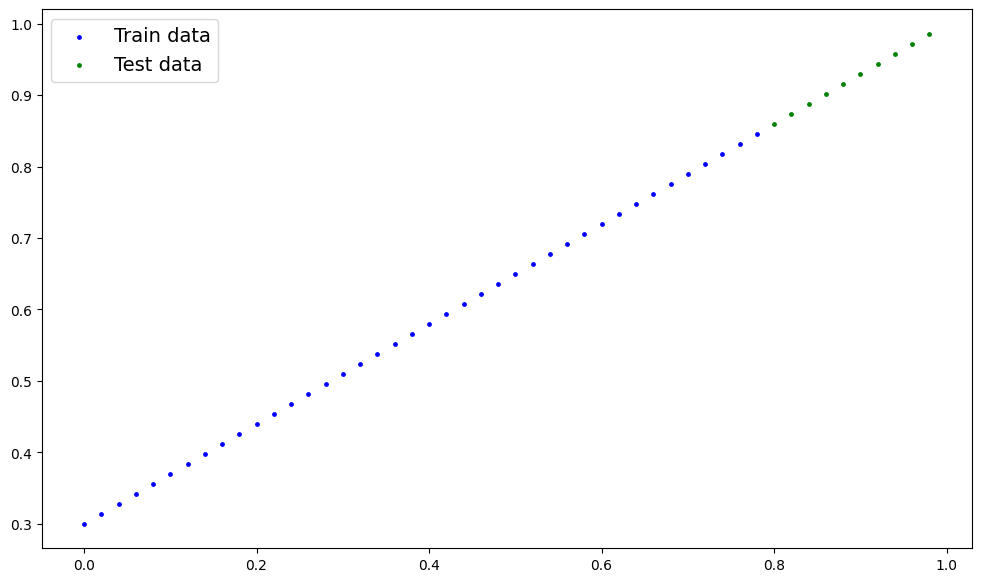

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

#Building model


In [ ]:
#create a linear model by subclassing nn.Module

class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()

    #Use nn.Linear()for creating the model parameter

    self.linear_layer=nn.Linear(in_features=1,
                                out_features=1)

  def forward(self, x:torch.tensor)->torch.tensor:
    return self.linear_layer(x)



#set the manual seed

torch.manual_seed(42)

model=LinearRegression()
model, model.state_dict()

(LinearRegression(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
next(model.parameters()).device

device(type='cpu')

In [ ]:
#Set the model to use the target device

In [ ]:
model.to(device)
next(model.parameters()).device

device(type='cpu')

#Training

In [ ]:
#set up loss function

loss_fn=nn.L1Loss()

#set up optimizer

optimizer=torch.optim.SGD(params=model.parameters(),
                          lr=0.01)

In [ ]:
torch.manual_seed(42)

epochs=200

#set data to target device

X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

for epoch in range(epochs):

  model.train()

  #1.Forward pass
  y_pred=model(X_train)

  #2.loss
  loss=loss_fn(y_pred, y_train)

  #3.optimizer zero grad
  optimizer.zero_grad()

  #4.backpropagation
  loss.backward()

  #5.optimizer step
  optimizer.step()

  ##testing

  model.eval()

  with torch.inference_mode():
    test_pred=model(X_test)

    test_loss=loss_fn(test_pred, y_test)


  #print out what's happening

  if epoch%10==0:
    print(f"Epoch: {epoch} | Loss:{loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss:0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss:0.4399680495262146 | Test Loss: 0.4392663538455963
Epoch: 20 | Loss:0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss:0.20954827964305878 | Test Loss: 0.16984674334526062
Epoch: 40 | Loss:0.09433844685554504 | Test Loss: 0.03513689711689949
Epoch: 50 | Loss:0.023886386305093765 | Test Loss: 0.04784906655550003
Epoch: 60 | Loss:0.0199567973613739 | Test Loss: 0.04580312222242355
Epoch: 70 | Loss:0.016517987474799156 | Test Loss: 0.0375305712223053
Epoch: 80 | Loss:0.013089170679450035 | Test Loss: 0.029944902285933495
Epoch: 90 | Loss:0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss:0.006215679459273815 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss:0.002787243574857712 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss:0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 130 | Loss:0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 14

In [ ]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

#Making and evaluating prediction

In [ ]:
#turn model to eval mode

model.eval()

#make prediction on test data

with torch.inference_mode():
  y_preds=model(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

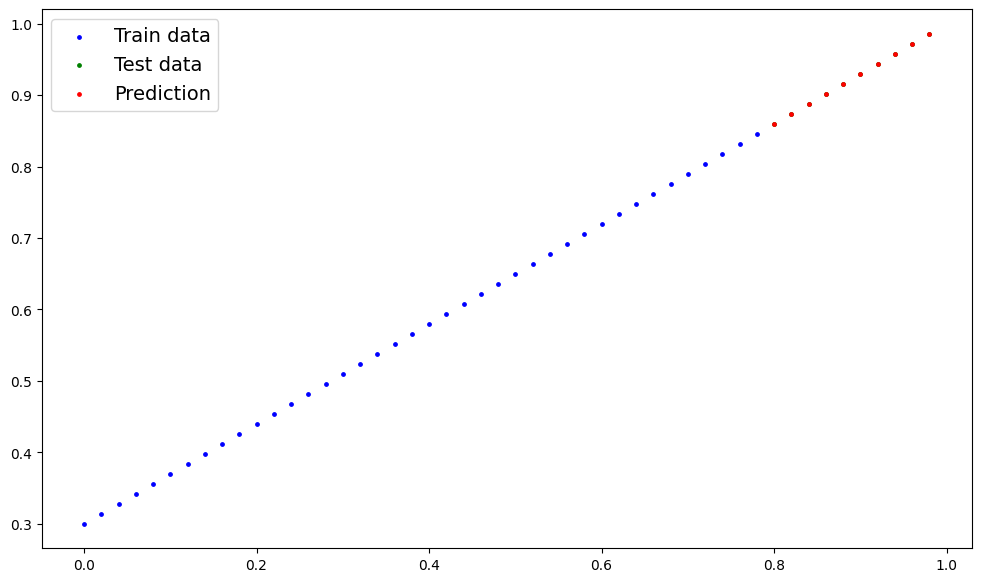

In [ ]:
#check our model prediction visuilization

#y_preds.cpu()


plot_predictions(prediction=y_preds)

#Saving and Loading the model

In [ ]:
from pathlib import Path


#create model directory

Model_path=Path("models")
Model_path.mkdir(parents=True, exist_ok=True)

#create model save path

Model_name="linearRegression.pth"
Model_save_path=Model_path/Model_name
Model_save_path


torch.save(obj=model.state_dict(),
           f=Model_save_path)

In [ ]:
#load the model


#create a new instance of lR model
loaded_model=LinearRegression()

#load the saved model.state_dict

loaded_model.load_state_dict(torch.load(Model_save_path))

#Put the loaded model to device

loaded_model.to(device)


LinearRegression(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model.parameters()).device

device(type='cpu')

In [ ]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
#Evaluate the loaded model

loaded_model.eval()

with torch.inference_mode():
  loaded_model_preds=loaded_model(X_test)

y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])